# Reverse Search - Vertices Only

Initializing the A and b Matrices

In [1]:
import numpy as np
import matplotlib.pyplot as plt


array = [
    [0.9206, 0, 0, 0, 0, 0, 0.9206, 0, 0, 0, 0.6406, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0.9206, 0, 0, 0, 0, 0, 0.9206, 0, 0, 0, 0.6406, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.07943, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0.9206, 0, 0, 0, 0, 0, 0.9206, 0, 0, 0, 0.6406, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.07943, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0.9206, 0, 0, 0, 0, 0, 0.9206, 0, 0, 0, 0.6406, 0, 0, 0, 0.6406, 0, 0, 0, 0, 0, 0.07943, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0.9206, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6406, 0, 0, 0, 0.6406, 0, 0, 0, 0, 0, 0.07943, 0, 0, 0, 0, 0.07943],
    [0, 0, 0, 0, 0, 0.9206, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6406, 0, 0, 0, 0.6406, 0.07943, 0, 0, 0, 0, 0.07943, 0, 0, 0.07943, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6406, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.07943, 0.07943, 0, 0]
]

b = [0.4, 0.1, 0.2, 0.05, 0.05, 0, 0.2]


# Perturbing 0 Vector to find another Vertex

Best Error: 0.8662510526257099 Temperature: 0.001
Best Error: 0.8511323105176247 Temperature: 0.001
Best Error: 0.850804654420541 Temperature: 0.001
Best Error: 0.8464546815669376 Temperature: 0.001
Best Error: 0.8416290080686111 Temperature: 0.001
Best Error: 0.8147721735545315 Temperature: 0.001
Best Error: 0.8002158482466766 Temperature: 0.001
Best Error: 0.7674709045835437 Temperature: 0.001
Best Error: 0.7622711140431037 Temperature: 0.001
Best Error: 0.756075767434818 Temperature: 0.001
Best Error: 0.7514747975257969 Temperature: 0.001
Best Error: 0.7309074073313598 Temperature: 0.001
Best Error: 0.6839233389638815 Temperature: 0.001
Best Error: 0.6560636066574781 Temperature: 0.001
Best Error: 0.6523791596112714 Temperature: 0.001
Best Error: 0.6522023749520018 Temperature: 0.001
Best Error: 0.6332896490103223 Temperature: 0.001
Best Error: 0.6318868510652523 Temperature: 0.001
Best Error: 0.6265463156342517 Temperature: 0.001
Best Error: 0.6228383214544949 Temperature: 0.001
Be

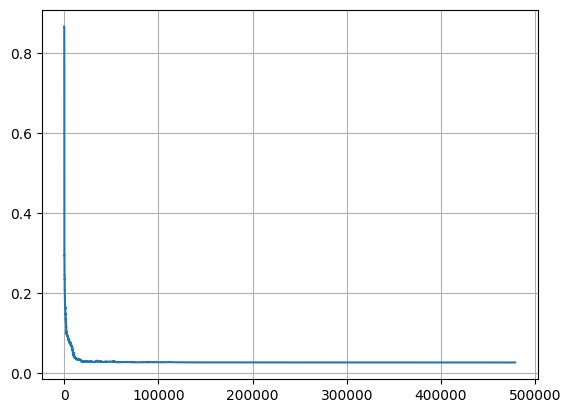

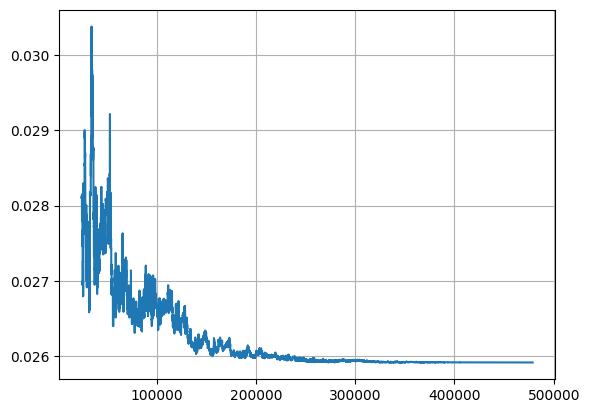

In [5]:
import numpy as np
import matplotlib.pyplot as plt


# Function to calculate the custom error
def calculate_error(phi, penal_mult):
    computed_b = np.dot(array, phi)
    diff = b - computed_b # Expected to be positive
    penalty1 = 4*np.sum(diff[diff < 0])  # Only sum negative differences and apply penalty
    penalty2 = 12.5 * np.min(diff) if np.min(diff) < 0 else 0
    penalty3 = 2*np.max(diff) # Super normal penalty for the largest positive difference
    penalty4 = penal_mult*(1-sum(phi))**2
    #penalty3 = 2.15*np.linalg.norm(diff, ord=2)  # L2 norm penalty
    penalties =  -penalty1 - penalty2 + penalty3 + penalty4 #+ penalty5
    return penalties

# Initial phi and error
initial_phi = np.zeros(len(array[0]))
computed_b = np.dot(array, initial_phi)
initial_error = calculate_error(initial_phi, penal_mult=1)


# Simulated Annealing setup
best_phi = initial_phi.copy()
best_error = initial_error
current_phi = best_phi.copy()
current_error = best_error

# Parameters
T = 10e-4  # Initial temperature
T_min = 10e-8  # Minimum temperature
alpha = 0.98  # Cooling rate
num_iterations = 1050  # Iterations per temperature
iter = 0
counter = []
error_values = []
best_values_all = []
best_values_all.append(best_phi)
step_size = 0.04
penal_mult = 1

# Annealing process
while T > T_min:
    
    for i in range(num_iterations):
        iter += 1
        # Make a small change to phi
        new_phi = current_phi.copy()
        #index = np.random.randint(0, len(new_phi))
        index = np.random.randint(0, len(new_phi))
        change = np.random.uniform(-step_size, step_size)  # Adjust magnitude of change as needed
        new_phi[index] += change
        new_phi[new_phi < 0] = 0  # Ensure non-negativity
        #Ensure new phi sums to 1
        if T < 0.00001:
            new_phi = new_phi/np.sum(new_phi)

        # Check if the sum constraint is violated
        if np.sum(new_phi) > 1:
            continue  # Skip the rest of the loop and do not update current_phi or current_error

        # Calculate new error
        new_error = calculate_error(new_phi, penal_mult)

        # Acceptance condition
        if new_error < current_error or np.random.uniform() < np.exp((current_error - new_error) / T):
            current_phi = new_phi
            current_error = new_error
            counter.append(iter)
            error_values.append(current_error/2)
            if new_error < best_error:
                best_error = new_error
                best_phi = new_phi
                print("Best Error:", best_error/2, "Temperature:", T)
                # Add best phi as a new row to the best_values_all list
                best_values_all.append(best_phi)

    # Cool down
    T *= alpha
    step_size *= alpha
    penal_mult *= 1.002

# Output results
print("Best Error:", best_error/2)
print("Best Phi:", np.round(best_phi, 3))

# Plotting the error values for each iteration

plt.plot(counter, error_values)
plt.grid()
plt.show()

# Plot counters and error_values from 200000 to 500000
plt.plot(counter[10000:], error_values[10000:])
plt.grid()
plt.show()



In [6]:
print ('Given b     ', b)
print()

sum(best_phi)
print('Best Phi:', np.round(best_phi,12))
print('Sum of best phi', sum(best_phi))


vertices = [best_phi] 
print()

for vertex in vertices:
    comp_b = np.dot(array, vertex)
    error = np.linalg.norm(b - comp_b)
    #print('Vertex', vertices.index(vertex)+1)
    print("Calculated b ", np.round(comp_b,4))
    print('Difference   ', np.round(b - comp_b,4))
    print('Infinity Norm', np.max(b - comp_b))
    print("L2 Norm      ", error)

    print()



Given b      [0.4, 0.1, 0.2, 0.05, 0.05, 0, 0.2]

Best Phi: [0.10596806 0.05553922 0.09395728 0.01006535 0.02616204 0.
 0.30038098 0.02493525 0.09514216 0.01609678 0.         0.
 0.         0.         0.         0.         0.2717529  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
Sum of best phi 1.0

Calculated b  [0.3741 0.0741 0.1741 0.0241 0.0241 0.     0.1741]
Difference    [0.0259 0.0259 0.0259 0.0259 0.0259 0.     0.0259]
Infinity Norm 0.025915227252375658
L2 Norm       0.06347885827608585



# PCA of best points

30
514
3
[0.21149397 0.20452372 0.06496655]
[-0.17423428  0.02794365 -0.02017164]


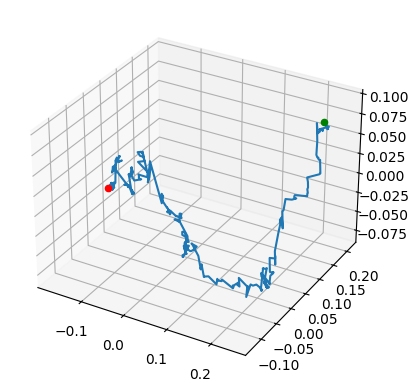

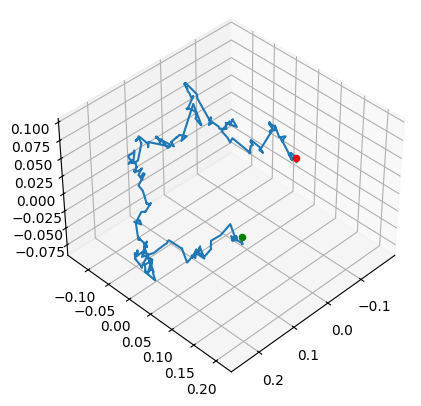

In [7]:
# Perform a PCA of 3 on the array best_values_all

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(best_values_all)
print(pca.n_features_in_)
print(pca.n_samples_)
print(pca.n_components_)

# Transform the data
transformed = pca.transform(best_values_all)
print(transformed[0])
print(transformed[-1])

# Plot the transformed data as a line plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(transformed[:, 0], transformed[:, 1], transformed[:, 2])
ax.scatter(transformed[0, 0], transformed[0, 1], transformed[0, 2], color='green')
ax.scatter(transformed[-1, 0], transformed[-1, 1], transformed[-1, 2], color='red')
plt.show()

# Show again from a different angle
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(transformed[:, 0], transformed[:, 1], transformed[:, 2])
ax.scatter(transformed[0, 0], transformed[0, 1], transformed[0, 2], color='green')
ax.scatter(transformed[-1, 0], transformed[-1, 1], transformed[-1, 2], color='red')
ax.view_init(elev=40, azim=45)
plt.show()



# Checking if point is a vertex

In [10]:
import numpy as np

def is_vertex(A, b, x):
    # Tolerance for floating point comparisons
    tol = 1e-9
    
    # Identify active constraints in Ax <= b
    active_constraints = np.where(np.abs(np.dot(A, x) - b) < tol)[0]
    
    # Identify active constraints in x >= 0
    active_nonneg_constraints = np.where(x < tol)[0]
    
    # Create the matrix A_total by combining active constraints
    A_eq = A[active_constraints, :]
    I_active = np.eye(len(x))[active_nonneg_constraints, :]
    A_total = np.vstack((A_eq, I_active))
    
    # Check if the number of active constraints is at least the number of variables
    if A_total.shape[0] < len(x):
        return False
    
    # Check if the rows of A_total are linearly independent by comparing rank
    rank_A_total = np.linalg.matrix_rank(A_total)
    
    return rank_A_total == len(x)

def perturb_points(x, perturbation, A, b):
    x1 = x.copy()
    x2 = x.copy()
    
    # Apply the perturbation to two indices
    x1[perturbation[0]] += perturbation[2]
    x1[perturbation[1]] -= perturbation[2]
    
    x2[perturbation[0]] -= perturbation[2]
    x2[perturbation[1]] += perturbation[2]
    
    # Check if both x1 and x2 are in the feasible region
    if (np.all(np.dot(A, x1) <= b) and np.all(x1 >= 0) and np.sum(x1) <= 1 and
        np.all(np.dot(A, x2) <= b) and np.all(x2 >= 0) and np.sum(x2) <= 1):
        return x1, x2
    return None, None

def find_points_averaging_to_x(A, b, x):
    # Small perturbation
    perturbation_magnitude = 0.027
    
    n = len(x)
    for i in range(n):
        for j in range(i + 1, n):
            # Create a perturbation vector
            perturbation = (i, j, perturbation_magnitude)
            
            # Attempt to find feasible perturbed points
            x1, x2 = perturb_points(x, perturbation, A, b)
            if x1 is not None and x2 is not None:
                return x1, x2
    
    raise ValueError("Could not find feasible perturbed points.")

# Assuming A, b, and x are defined as previously
A = np.array(array)
b = np.array(b)
x = best_phi.copy()
x = x/np.sum(x)

if is_vertex(A, b, x):
    print("The point is a vertex.")
else:
    x1, x2 = find_points_averaging_to_x(A, b, x)
    print("The point is not a vertex.")
    print("Here are two points that average to the given point:")
    print()
    print("Point 1:", np.round(x1,3))
    print("Original:", np.round(x,3))
    print("Point 2:", np.round(x2,3))


The point is not a vertex.
Here are two points that average to the given point:

Point 1: [0.133 0.029 0.094 0.01  0.026 0.    0.3   0.025 0.095 0.016 0.    0.
 0.    0.    0.    0.    0.272 0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.   ]
Original: [0.106 0.056 0.094 0.01  0.026 0.    0.3   0.025 0.095 0.016 0.    0.
 0.    0.    0.    0.    0.272 0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.   ]
Point 2: [0.079 0.083 0.094 0.01  0.026 0.    0.3   0.025 0.095 0.016 0.    0.
 0.    0.    0.    0.    0.272 0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.   ]
